In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))# 0: cuda cdnn

Num GPUs Available:  0


In [18]:
mnist = tf.keras.datasets.mnist

(training_data, training_labels), (test_data, test_labels) = mnist.load_data()
training_data, test_data = training_data / 255, test_data / 255
training_data.shape

(60000, 28, 28)

In [19]:
jobs = [
    {"price": 90,
    "ege": 270,
    "age": 30},
    {"price": 40,
    "ege": 285,
    "age": 33},
    {"price": 100,
    "ege": 285,
    "age": 22},
    {"price": 20,
    "ege": 160,
    "age": 56}]
condidates = [
    {"exp": 10,
    "ege": 270,
    "age": 30,},
    {"exp": 5,
    "ege": 190,
    "age": 50}]
labels = np.array([1.0, 1.0, 0.7, 1.0, 0.2, 0.2, 0.1, 1.0])

In [20]:
data = [list(i.values()) + list(j.values()) for j in condidates for i in jobs]
data = np.array(data)/270
data

array([[0.33333333, 1.        , 0.11111111, 0.03703704, 1.        ,
        0.11111111],
       [0.14814815, 1.05555556, 0.12222222, 0.03703704, 1.        ,
        0.11111111],
       [0.37037037, 1.05555556, 0.08148148, 0.03703704, 1.        ,
        0.11111111],
       [0.07407407, 0.59259259, 0.20740741, 0.03703704, 1.        ,
        0.11111111],
       [0.33333333, 1.        , 0.11111111, 0.01851852, 0.7037037 ,
        0.18518519],
       [0.14814815, 1.05555556, 0.12222222, 0.01851852, 0.7037037 ,
        0.18518519],
       [0.37037037, 1.05555556, 0.08148148, 0.01851852, 0.7037037 ,
        0.18518519],
       [0.07407407, 0.59259259, 0.20740741, 0.01851852, 0.7037037 ,
        0.18518519]])

In [21]:

(training_data, training_labels) = (data, labels)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.nn.relu, input_shape=(6, )),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])


model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 35        
                                                                 
 dense_5 (Dense)             (None, 2)                 12        
                                                                 
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(training_data, training_labels, epochs=50)

# model.evaluate(test_data, test_labels)

Epoch 1/50
1/1 [==============================] - 0s 295ms/step - loss: 0.7508 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 0.7493 - accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 0.7479 - accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 0.7465 - accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 0.7451 - accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 0.7437 - accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 0.7424 - accuracy: 0.0000e+00
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 0.7411 - accuracy: 0.0000e+00
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 0.7399 - accuracy: 0.0000e+00
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 0.7387 - accuracy: 0.0000e+

In [24]:
predictions = model.predict([[0.2, 1, 0.1, 0.03, 1, 0.1]]) # test
print(history.history.keys())

1/1 [==============================] - 0s 43ms/step
dict_keys(['loss', 'accuracy'])


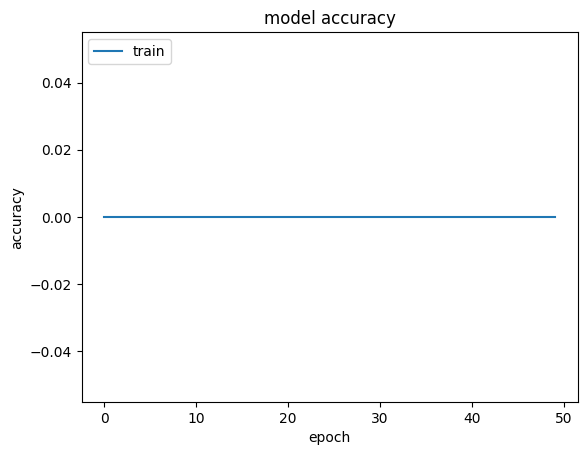

7
[0.58635354 0.41364643]


In [25]:
np.set_printoptions(suppress=True)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(test_labels[0])
print(predictions[0])